In [1]:
%run functions.ipynb

## Non-Ovelapping , Amplify test

In [2]:
# Generate Input PSD
fmin = 1; fmax = 5000; bwp = 1; loc = 0; fn1 = 2500; zeta1 = 0.1;
freq_spec,psd_spec = unimodal(fmin,fmax,bwp,loc,fn1,zeta1);
# Band Split
fi = np.linspace(min(freq_spec),max(freq_spec),10000);
pi = log_interp(fi,freq_spec,psd_spec);
dfi,dpi = band_split(fi,pi,2);
# Calculate FDS
fn,D  = FDS_dirlik(fi    ,pi      ,zeta=0.1,m=4,T=1,C=1);
fn,D1 = FDS_dirlik(dfi[0],dpi[0]*1,zeta=0.1,m=4,T=1,C=1);
fn,D2 = FDS_dirlik(dfi[1],dpi[1]*1,zeta=0.1,m=4,T=1,C=1);

99.99999999999999


In [30]:
# Generate Input PSD
fmin = 1; fmax = 5000; bwp = 1; loc = 0; fn1 = 100; zeta1 = 0.1;
freq_spec,psd_spec = unimodal(fmin,fmax,bwp,loc,fn1,zeta1);
# Band Split
fi = np.linspace(min(freq_spec),max(freq_spec),10000);
pi = log_interp(fi,freq_spec,psd_spec);
dfi,dpi = band_split(fi,pi,2);

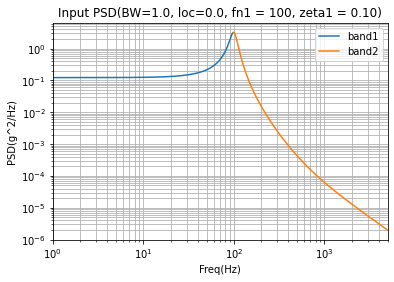

In [31]:
plt.plot(dfi[0],dpi[0],label='band1'); plt.plot(dfi[1],dpi[1],label='band2'); plt.legend();
plt.xscale('log'); plt.yscale('log'); plt.xlim(fmin,fmax); plt.title('Input PSD(BW=%.1f, loc=%.1f, fn1 = %d, zeta1 = %.2f)'%(bwp,loc,fn1,zeta1)); plt.xlabel('Freq(Hz)'); plt.ylabel('PSD(g^2/Hz)');
plt.grid(b=True, which='both', linestyle='-');

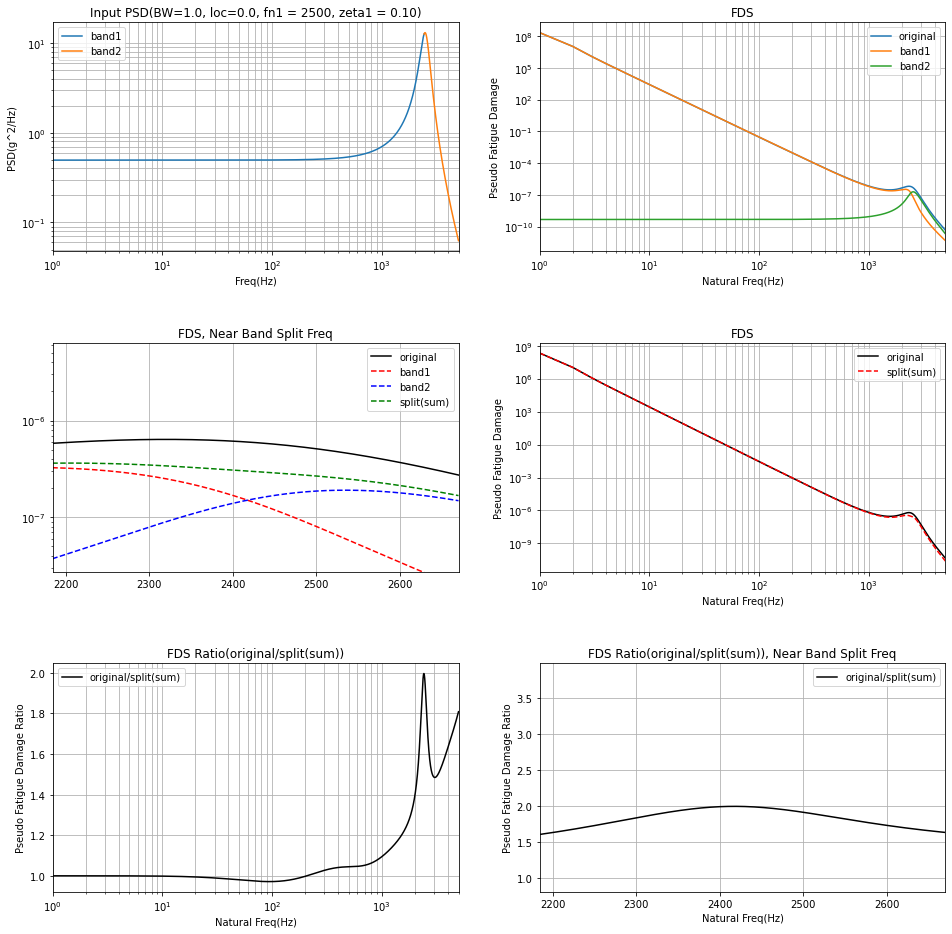

In [3]:
# Plot
plt.figure(figsize=(16,16));
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)
plt.subplot(321);
plt.plot(dfi[0],dpi[0],label='band1'); plt.plot(dfi[1],dpi[1],label='band2'); plt.legend();
plt.xscale('log'); plt.yscale('log'); plt.xlim(fmin,fmax); plt.title('Input PSD(BW=%.1f, loc=%.1f, fn1 = %d, zeta1 = %.2f)'%(bwp,loc,fn1,zeta1)); plt.xlabel('Freq(Hz)'); plt.ylabel('PSD(g^2/Hz)');
plt.grid(b=True, which='both', linestyle='-');
plt.subplot(322);
plt.plot(fn,D,label='original'); plt.plot(fn,D1,label='band1'); plt.plot(fn,D2,label='band2'); 
plt.xscale('log'); plt.yscale('log'); plt.legend(); plt.xlim(fmin,fmax);
plt.title('FDS'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage');
plt.grid(b=True, which='both', linestyle='-');
plt.subplot(323);
xlim1 = max(dfi[0])*0.9; xlim2 = min(dfi[1])*1.1;
ylim1 = min(D[(fn>xlim1)&(fn<xlim2)])*0.1; 
ylim2 = max(D[(fn>xlim1)&(fn<xlim2)])*10; 
plt.plot(fn,D,'k-',label='original'); plt.plot(fn,D1,'r--',label='band1'); plt.plot(fn,D2,'b--',label='band2'); 
plt.plot(fn,D1+D2,'g--',label='split(sum)');  plt.yscale('log');
plt.legend(); plt.xlim(xlim1,xlim2); plt.ylim(ylim1,ylim2);
plt.title('FDS, Near Band Split Freq');
plt.grid(b=True, which='major', linestyle='-');
plt.subplot(324);
plt.plot(fn,D,'k-',label='original'); plt.plot(fn,D1+D2,'r--',label='split(sum)');  
plt.xscale('log'); plt.yscale('log'); plt.legend(); plt.xlim(fmin,fmax);
plt.title('FDS'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage');
plt.grid(b=True, which='both', linestyle='-');
plt.subplot(325);
rD = D/(D1+D2);
plt.plot(fn,rD,'k-',label='original/split(sum)');
plt.legend(); plt.xlim(fmin,fmax);
plt.xscale('log'); plt.title('FDS Ratio(original/split(sum))'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage Ratio');
plt.grid(b=True, which='both', linestyle='-');
plt.subplot(326);
plt.plot(fn,rD,'k-',label='original/split(sum)');
ylim1 = min(rD[(fn>xlim1)&(fn<xlim2)])*0.5; ylim2 = max(rD[(fn>xlim1)&(fn<xlim2)])*2;
plt.grid(which='both'); plt.legend(); plt.xlim(xlim1,xlim2); plt.ylim(ylim1,ylim2);
plt.title('FDS Ratio(original/split(sum)), Near Band Split Freq'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage Ratio');\
plt.grid(b=True, which='both', linestyle='-');
plt.savefig('uni_BW%.1f_LOC%.1f_fn1%d_z1%.2f_10d_8m_x1.png'%(bwp,loc,fn1,zeta1), dpi=300);  # Bandwidth, Location, 10% damping FDS, m = 4, psd 1배
plt.close();

## Non-Ovelapping , Amplify Loop

In [2]:
fn11 = np.array([10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000]);

In [3]:
for i in range(20):
    for j in range(1,6):
        # Generate Input PSD
        fmin = 1; fmax = 5000; bwp =1; loc = 0; fn1 = fn11[i]; zeta1 = 0.02*j;
        freq_spec,psd_spec = unimodal(fmin,fmax,bwp,loc,fn1,zeta1);
        # Band Split
        fi = np.linspace(min(freq_spec),max(freq_spec),5000);
        pi = log_interp(fi,freq_spec,psd_spec);
        dfi,dpi = band_split(fi,pi,2);
        # Calculate FDS
        fn,D = FDS_dirlik(fi,pi,zeta=0.01,m=4,T=1,C=1);
        fn,D1 = FDS_dirlik(dfi[0],dpi[0]*np.sqrt(2),zeta=0.01,m=4,T=1,C=1);
        fn,D2 = FDS_dirlik(dfi[1],dpi[1]*np.sqrt(2),zeta=0.01,m=4,T=1,C=1);
        # Plot
        plt.figure(figsize=(16,16));
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)
        plt.subplot(321);
        plt.plot(dfi[0],dpi[0],label='band1'); plt.plot(dfi[1],dpi[1],label='band2'); plt.legend();
        plt.xscale('log'); plt.yscale('log'); plt.xlim(fmin,fmax); plt.title('Input PSD(BW=%.1f, loc=%.1f, fn1 = %d, zeta1 = %.2f)'%(bwp,loc,fn1,zeta1)); plt.xlabel('Freq(Hz)'); plt.ylabel('PSD(g^2/Hz)');
        plt.grid(b=True, which='both', linestyle='-');
        plt.subplot(322);
        plt.plot(fn,D,label='original'); plt.plot(fn,D1,label='band1'); plt.plot(fn,D2,label='band2'); 
        plt.xscale('log'); plt.yscale('log'); plt.legend(); plt.xlim(fmin,fmax);
        plt.title('FDS'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage');
        plt.grid(b=True, which='both', linestyle='-');
        plt.subplot(323);
        xlim1 = max(dfi[0])*0.9; xlim2 = min(dfi[1])*1.1;
        ylim1 = min(D[(fn>xlim1)&(fn<xlim2)])*0.1; 
        ylim2 = max(D[(fn>xlim1)&(fn<xlim2)])*10; 
        plt.plot(fn,D,'k-',label='original'); plt.plot(fn,D1,'r--',label='band1'); plt.plot(fn,D2,'b--',label='band2'); 
        plt.plot(fn,D1+D2,'g--',label='split(sum)');  plt.yscale('log');
        plt.legend(); plt.xlim(xlim1,xlim2); plt.ylim(ylim1,ylim2);
        plt.title('FDS, Near Band Split Freq');
        plt.grid(b=True, which='major', linestyle='-');
        plt.subplot(324);
        plt.plot(fn,D,'k-',label='original'); plt.plot(fn,D1+D2,'r--',label='split(sum)');  
        plt.xscale('log'); plt.yscale('log'); plt.legend(); plt.xlim(fmin,fmax);
        plt.title('FDS'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage');
        plt.grid(b=True, which='both', linestyle='-');
        plt.subplot(325);
        rD = D/(D1+D2);
        plt.plot(fn,rD,'k-',label='original/split(sum)');
        plt.legend(); plt.xlim(fmin,fmax);
        plt.xscale('log'); plt.title('FDS Ratio(original/split(sum))'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage Ratio');
        plt.grid(b=True, which='both', linestyle='-');
        plt.subplot(326);
        plt.plot(fn,rD,'k-',label='original/split(sum)');
        ylim1 = min(rD[(fn>xlim1)&(fn<xlim2)])*0.5; ylim2 = max(rD[(fn>xlim1)&(fn<xlim2)])*2;
        plt.grid(which='both'); plt.legend(); plt.xlim(xlim1,xlim2); plt.ylim(ylim1,ylim2);
        plt.title('FDS Ratio(original/split(sum)), Near Band Split Freq'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage Ratio');\
        plt.grid(b=True, which='both', linestyle='-');
        plt.savefig('uni_BW%.1f_LOC%.1f_fn1%d_z1%.2f_10d_8m_x1.png'%(bwp,loc,fn1,zeta1), dpi=300);   # Bandwidth, Location, 1% damping FDS, m = 4
        plt.close();

<ipython-input-1-4c4ac909debc>:9: RuntimeWarning: invalid value encountered in sqrt
  grms_tmp = np.sqrt(np.trapz(out,f));


IndexError: index 1 is out of bounds for axis 0 with size 1